# FOOTBALL MANAGER DATASET

# Índice
1. [Fase 2: Comprensión de los datos](#fase-2-comprensión-de-los-datos)
   - [1.1 Descripción de los datos](#1-1-descripción-de-los-datos)
   - [1.2 Análisis exploratorio](#1-2-análisis-exploratorio)
   - [1.3 Calidad de datos](#1-3-calidad-de-datos)

2. [Fase 3: Preparación de los datos](#fase-3-preparación-de-los-datos)
   - [2.1 Limpieza](#2-1-limpieza)
   - [2.2 Integración](#2-2-integración)
   - [2.3 Estructuración](#2-3-estructuración)
   - [2.4 Ingeniería de características](#2-4-ingeniería-de-características)

3. [Fase 4: Modelado](#fase-4-modelado)
   - [3.1 Definición del modelo](#3-1-definición-del-modelo)
   - [3.2 Predicción](#3-2-predicción)
   - [3.3 Evaluación](#3-3-evaluación)

4. [Fase 5: Evaluación](#fase-5-evaluación)
   - [4.1 Evaluación de los datos de prueba](#4-1-evaluación-de-los-datos-de-prueba)
   - [4.2 Importancia características](#4-2-importancia-características)
   - [4.3 Predicción](#4-3-predicción)

Datos de Football Manager de 2023

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from joblib import dump, load
import os
# import kaggle

In [167]:
# Para descargar los archivos via API es necesario tener un token almacenado en un archivo kaggle.json en el directorio ~/.kaggle/
# def descargar_archivo(dataset, ruta_archivo):
#     if not os.path.exists(ruta_archivo):
#         print(f"Descargando archivo: {ruta_archivo}")
#         kaggle.api.dataset_download_files(dataset, path=ruta_archivo, unzip=True)
#         print(f"Archivo descargado en {ruta_archivo}")
#     else:
#         print(f"El archivo ya existe: {ruta_archivo}")
#
# # Configura la ruta del archivo
# ruta_jugadores = 'data/FM 2023.csv'
#
# # Descarga los archivos si no existen
# descargar_archivo('platinum22/foot-ball-manager-2023-dataset', ruta_jugadores)

### Fase 2: Comprensión de los datos

#### 2.1 Análisis exploratorio

In [168]:
ruta_jugadores = 'data/FM 2023.csv'
df_jugadores = pd.read_csv(ruta_jugadores,low_memory = False)
df_jugadores.head(5)

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755


In [169]:
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 8452 non-null   object 
 1   Position                             8452 non-null   object 
 2   Age                                  8452 non-null   int64  
 3   ca                                   8452 non-null   int64  
 4   pa                                   8452 non-null   int64  
 5   Nationality                          8452 non-null   object 
 6   Club                                 8345 non-null   object 
 7   Corners                              8452 non-null   int64  
 8   Crossing                             8452 non-null   int64  
 9   Dribbling                            8452 non-null   int64  
 10  Finishing                            8452 non-null   int64  
 11  First Touch                   

In [170]:
print(f'En el dataset hay: {len(pd.unique(df_jugadores["Name"]))} jugadores, correspondiente a {len(pd.unique(df_jugadores["Club"]))} clubes.')

En el dataset hay: 8452 jugadores, correspondiente a 919 clubes.


In [171]:
df_jugadores_filtrado = df_jugadores.copy()

#### 2.2 Calidad de los datos

In [172]:
df_jugadores_filtrado.isnull().sum()

Name                                      0
Position                                  0
Age                                       0
ca                                        0
pa                                        0
                                       ... 
Number of national team appearances       0
Goals scored for the national team        0
Salary                                  107
Rental club                            7457
UID                                       0
Length: 98, dtype: int64

Club            107
Salary          107
Rental club    7457


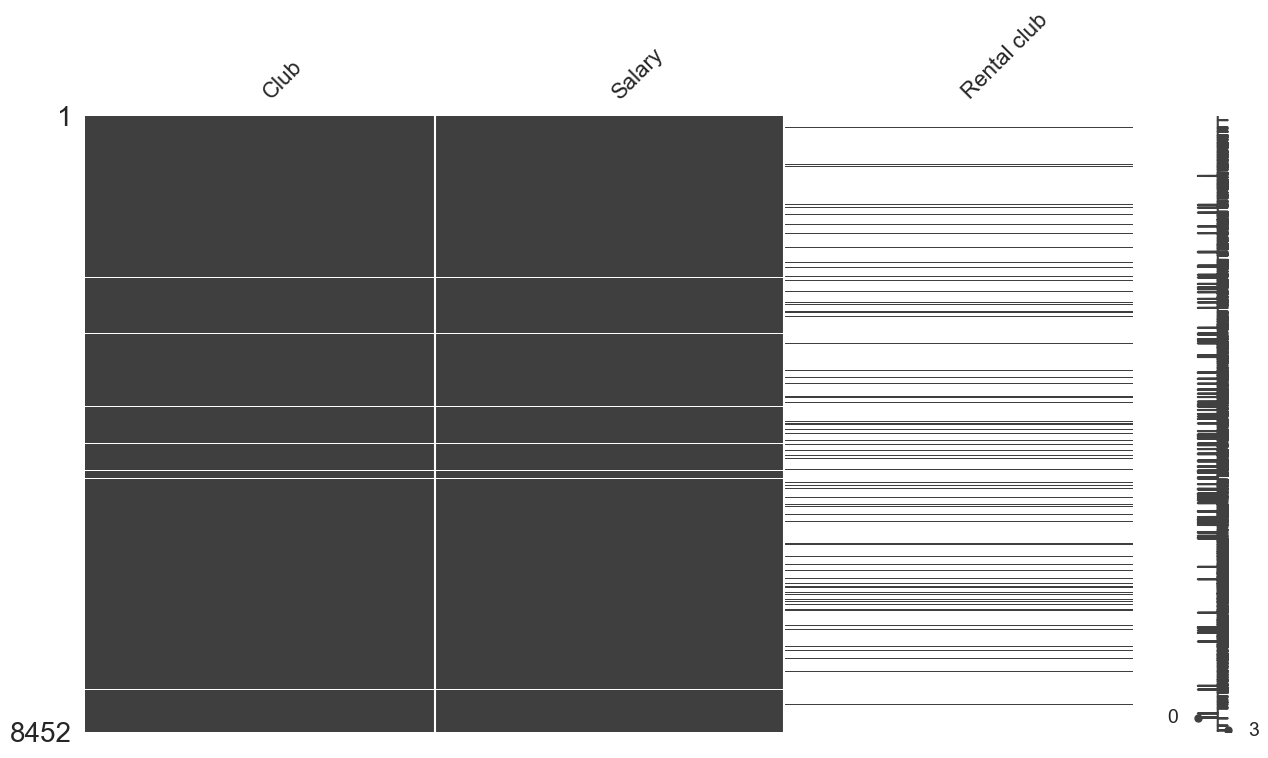

In [173]:
null_values_series = df_jugadores_filtrado.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string())
msno.matrix(df_jugadores_filtrado[null_values_series.index.tolist()], figsize=(15, 8));

In [174]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Valores Faltantes', 1: '% de Valores Totales'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
    print("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
                                                     "Hay " + str(mis_val_table_ren_columns.shape[0]) +
          " columnas que les faltan valores.")
    return mis_val_table_ren_columns
missing_values_table(df_jugadores_filtrado)

El dataframe tiene 98 columnas.
Hay 3 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
Rental club,7457,88.2
Club,107,1.3
Salary,107,1.3


In [175]:
missing_df = missing_values_table(df_jugadores_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')

El dataframe tiene 98 columnas.
Hay 3 columnas que les faltan valores.
Se eliminan 1 columnas.
Son: ['Rental club']


In [176]:
df_jugadores_filtrado = df_jugadores_filtrado.drop(list(missing_columns), axis=1)

In [177]:
df_jugadores_filtrado

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9398,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9400,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,9250,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,9445,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,98028755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,2270,236,Northern_European,41,3,2006/6/26,0,0,203.0,2000210572
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,2348,462,Northern_European,33,255,2005/4/3,0,0,402.0,2000197059
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,3055,1145,Northern_European,41,3,1999/2/11,0,0,82.0,2000047739
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,2350,474,Northern_European,40,255,2005/1/20,0,0,646.0,2000197383


In [178]:
df_jugadores_filtrado = df_jugadores_filtrado.drop(['GK', 'DL', 'DC', 'DR', 'WBL', 'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC','AMR', 'ST', 'Height', 'Weight', 'Race', 'Colour of skin', 'Date of birth', 'UID', 'Position.1', 'RCA'], axis=1)
df_jugadores_filtrado

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Emotional control,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Number of national team appearances,Goals scored for the national team,Salary
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [179]:
df_jugadores_filtrado = df_jugadores_filtrado.rename(columns={
    'Name': 'Nombre',
    'Position': 'Posicion',
    'Age': 'Edad',
    'ca': 'Habilidad_Actual',
    'pa': 'Habilidad_Potencial',
    'Nationality': 'Nacionalidad',
    'Club': 'Club',
    'Corners': 'Corners',
    'Crossing': 'Centros',
    'Dribbling': 'Regate',
    'Finishing': 'Finalización',
    'First Touch': 'Primer_Toque',
    'Free Kick Taking': 'Tiro_Libre',
    'Heading': 'Cabeceo',
    'Long Shots': 'Tiros_Largos',
    'Long Throws': 'Lanzamientos_Largos',
    'Marking': 'Marcado',
    'Passing': 'Pases',
    'Penalty Taking': 'Penales',
    'Tackling': 'Entradas',
    'Technique': 'Técnica',
    'Aggressiion': 'Agresividad',
    'Anticipation': 'Anticipación',
    'Bravery': 'Valentía',
    'Composure': 'Compostura',
    'Concentration': 'Concentración',
    'Vision': 'Visión',
    'Decision': 'Decisión',
    'Determination': 'Determinación',
    'Flair': 'Talento',
    'Leadership': 'Liderazgo',
    'Off The Ball': 'Sin_balon',
    'Teamwork': 'Trabajo_en_Equipo',
    'Work Rate': 'Ritmo_de_Trabajo',
    'Acceleration': 'Aceleración',
    'Agility': 'Agilidad',
    'Balance': 'Equilibrio',
    'Jumping Reach': 'Salto',
    'Natural Fitness': 'Condición_Física',
    'Pace': 'Ritmo',
    'Stamina': 'Resistencia',
    'Strength': 'Fuerza',
    'Stability': 'Estabilidad',
    'Foul': 'Falta',
    'Contest performance': 'Rendimiento_con_Competencia',
    'Injury': 'Lesión',
    'diversity': 'Diversidad',
    'Aerial Reach': 'Alcance_Aéreo',
    'Command Of Area': 'Dominio_del_Área',
    'Communication': 'Comunicación',
    'Eccentricity': 'Excentricidad',
    'Handling': 'Manejo',
    'Kicking': 'Patada',
    'One On Ones': 'Uno_Contra_Uno',
    'Reflexes': 'Reflejos',
    'Rushing Out': 'Salir_Rápido',
    'Punching': 'Golpeo',
    'Throwing': 'Lanzamiento',
    'Adaptation': 'Adaptación',
    'Ambition': 'Ambición',
    'Argue': 'Discutir',
    'Loyal': 'Lealtad',
    'Resistant to stress': 'Resistencia_al_Estrés',
    'Professional': 'Profesional',
    'Sportsmanship': 'Deportividad',
    'Emotional control': 'Control_Emocional',
    'Left Foot': 'Pie_Izquierdo',
    'Right Foot': 'Pie_Derecho',
     'Values': 'Valores',
    'Current reputation': 'Reputación_actual',
    'Domestic reputation': 'Reputación_doméstica',
    'World reputation': 'Reputación_mundial',
    'Number of national team appearances': 'Número_de_apariciones_en_equipo_nacional',
    'Goals scored for the national team': 'Goles_marcados_para_el_equipo_nacional',
    'Salary': 'Salario'
})

In [180]:
df_jugadores_filtrado

,Nombre,Posicion,Edad,Habilidad_Actual,Habilidad_Potencial,Nacionalidad,Club,Corners,Centros,Regate,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


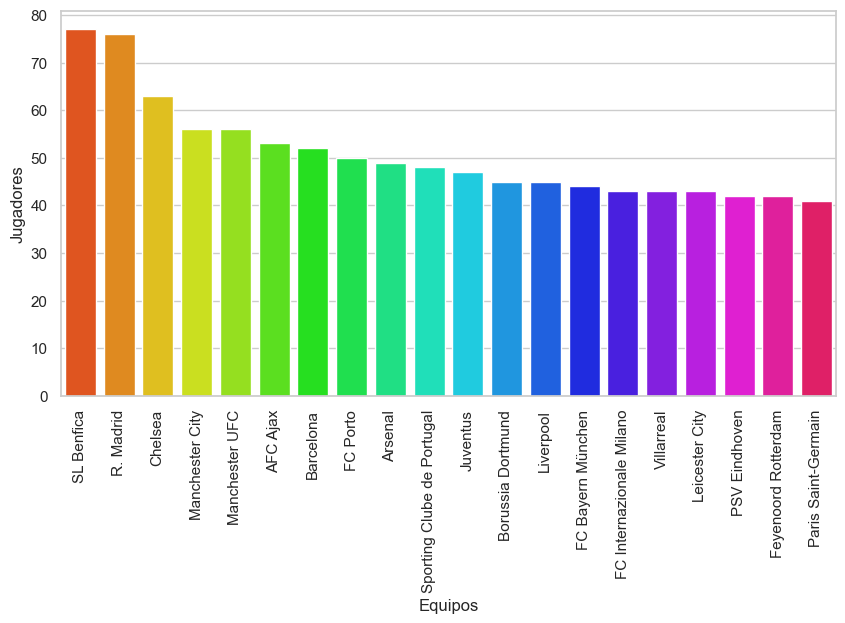

In [181]:
# visualizar los 20 equipos con más jugadores con sns
top_20_clubs = df_jugadores_filtrado['Club'].value_counts().nlargest(20).index

df_top_20_clubs = df_jugadores_filtrado[df_jugadores_filtrado['Club'].isin(top_20_clubs)]
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Club', data=df_top_20_clubs, palette='hsv', order = df_top_20_clubs['Club'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Equipos')
chart.set_ylabel('Jugadores')
plt.savefig('resources/1.distribucion_jugadores_por_top_20_clubs.png', bbox_inches='tight')

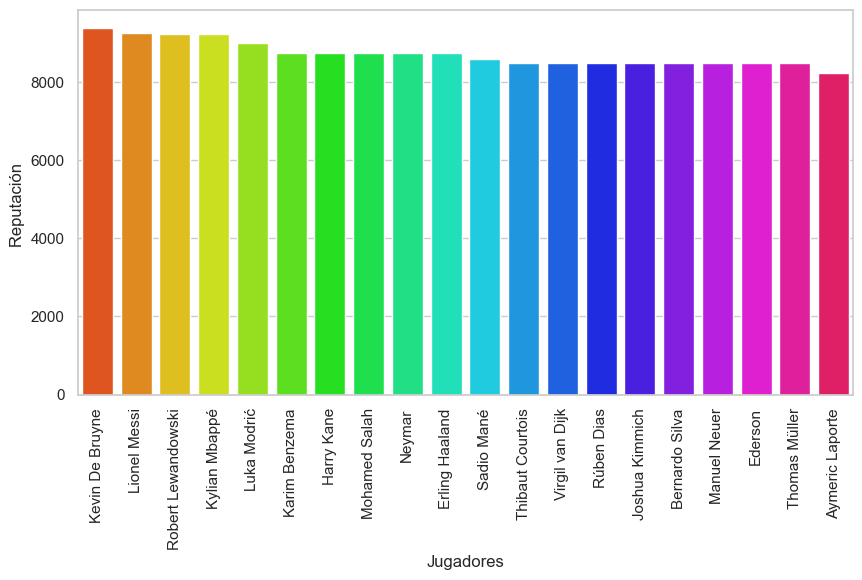

In [182]:
# mostrar los 20 jugadores con mayor "Reputación Mundial"
top_20_jugadores = df_jugadores_filtrado.sort_values('Reputación_mundial', ascending=False).head(20)
plt.figure(figsize=(10,5))
chart = sns.barplot(x='Nombre', y='Reputación_mundial', data=top_20_jugadores, palette='hsv')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Jugadores')
chart.set_ylabel('Reputación ')
plt.savefig('resources/2.reputacion_mundial_top_20_jugadores.png', bbox_inches='tight')

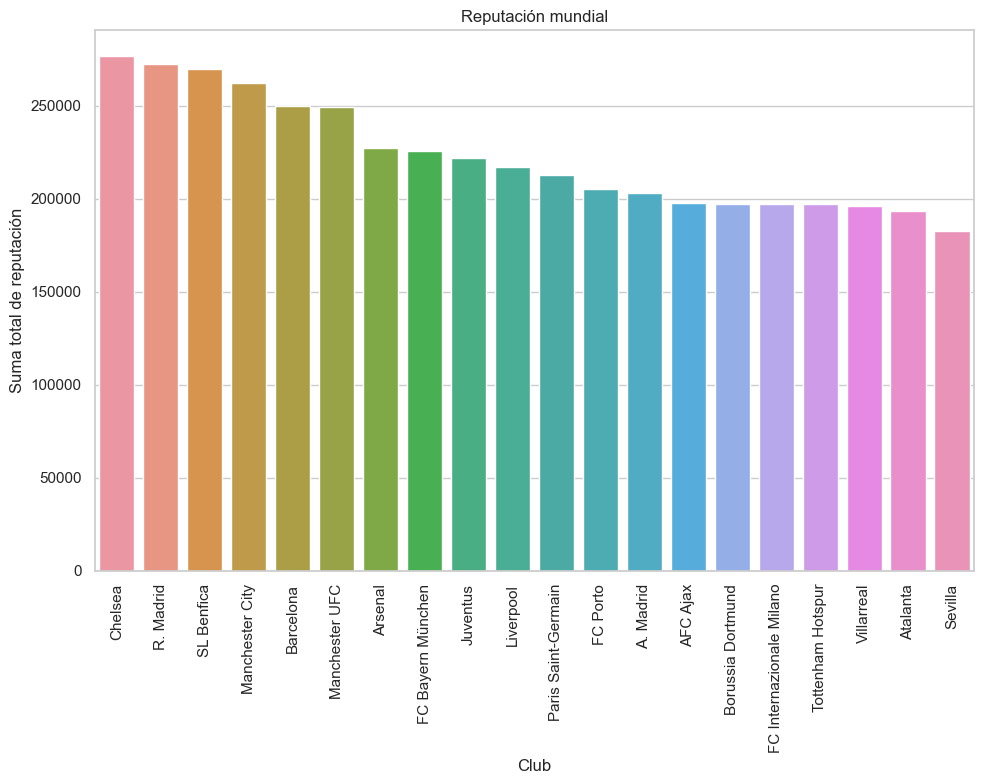

In [183]:
# 20 equipos con 'Reputación_mundial'
df_suma_reputacion = df_jugadores_filtrado.groupby('Club')['Reputación_mundial'].sum()
df_suma_reputacion_ordenada = df_suma_reputacion.sort_values(ascending=False)
top_20_equipos_reputacion = df_suma_reputacion_ordenada.head(20)

plt.figure(figsize=(10,8))
ax = sns.barplot(x=top_20_equipos_reputacion.index, y=top_20_equipos_reputacion.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Reputación mundial')
plt.ylabel('Suma total de reputación')
plt.tight_layout()
plt.savefig('resources/3.top_20_equipos_reputacion.png')
plt.show()

In [140]:
hay_duplicados = df_jugadores_filtrado.duplicated().any()
print(hay_duplicados)

False


In [141]:
unicos_por_columna = df_jugadores_filtrado.nunique()

unicos_por_columna_ordenados = unicos_por_columna.sort_values(ascending=True)

print(unicos_por_columna_ordenados)

Decisión                  15
Agilidad                  16
Dominio_del_Área          17
Manejo                    17
Reflejos                  17
                        ... 
Reputación_doméstica    2143
Reputación_mundial      2592
Salario                 3636
Valores                 6861
Nombre                  8452
Length: 75, dtype: int64


In [142]:
df_jugadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Nombre                                    8452 non-null   object 
 1   Posicion                                  8452 non-null   object 
 2   Edad                                      8452 non-null   int64  
 3   Habilidad_Actual                          8452 non-null   int64  
 4   Habilidad_Potencial                       8452 non-null   int64  
 5   Nacionalidad                              8452 non-null   object 
 6   Club                                      8345 non-null   object 
 7   Corners                                   8452 non-null   int64  
 8   Centros                                   8452 non-null   int64  
 9   Regate                                    8452 non-null   int64  
 10  Finalización                        

### Fase 3: preparación de los datos

#### 3.1 Ingeniería de características

In [143]:
df_encoded = df_jugadores_filtrado.copy()
df_encoded

,Nombre,Posicion,Edad,Habilidad_Actual,Habilidad_Potencial,Nacionalidad,Club,Corners,Centros,Regate,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [144]:
eliminar = ['Nombre', 'Posicion', 'Nacionalidad', 'Club']
df_encoded = df_encoded.drop(columns=eliminar,  axis=1)
df_encoded

,Edad,Habilidad_Actual,Habilidad_Potencial,Corners,Centros,Regate,Finalización,Primer_Toque,Tiro_Libre,Cabeceo,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,31,189,189,14,19,15,16,16,17,6,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,23,188,197,13,13,18,17,18,12,7,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,33,186,190,3,8,13,19,18,15,17,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,22,185,195,7,10,14,18,16,13,15,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,30,185,187,12,14,17,17,17,12,10,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,16,45,135,3,4,5,4,4,1,6,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,17,45,135,2,2,11,11,11,2,6,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,23,45,-75,1,1,1,2,4,1,12,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,17,45,135,3,4,12,7,8,3,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [145]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Edad                                      8452 non-null   int64  
 1   Habilidad_Actual                          8452 non-null   int64  
 2   Habilidad_Potencial                       8452 non-null   int64  
 3   Corners                                   8452 non-null   int64  
 4   Centros                                   8452 non-null   int64  
 5   Regate                                    8452 non-null   int64  
 6   Finalización                              8452 non-null   int64  
 7   Primer_Toque                              8452 non-null   int64  
 8   Tiro_Libre                                8452 non-null   int64  
 9   Cabeceo                                   8452 non-null   int64  
 10  Tiros_Largos                        

In [146]:
# obtenemos el df codificado
df_encoded.describe()

,Edad,Habilidad_Actual,Habilidad_Potencial,Corners,Centros,Regate,Finalización,Primer_Toque,Tiro_Libre,Cabeceo,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
count,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,...,8452.000000,8452.000000,8452.000000,8.452000e+03,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8.345000e+03
mean,24.989115,119.814600,94.493256,8.140558,9.435045,10.819569,9.170611,12.039754,8.626242,9.764316,...,12.617014,12.531945,17.192262,3.257098e+07,5945.926408,5902.600686,3878.133460,9.171320,1.164931,2.089091e+04
std,5.396250,17.919516,84.594675,3.366027,3.429934,3.574914,3.526125,2.201608,3.183615,3.505773,...,3.325608,4.880496,4.909458,8.473163e+07,941.637614,964.621369,1526.731509,20.476538,4.691955,4.235218e+04
min,15.000000,45.000000,-95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000e+00,1000.000000,1376.000000,50.000000,0.000000,0.000000,0.000000e+00
25%,21.000000,114.000000,123.000000,6.000000,7.000000,9.000000,7.000000,11.000000,6.000000,7.000000,...,10.000000,9.000000,14.000000,1.682008e+06,5594.000000,5496.000000,2957.750000,0.000000,0.000000,2.821000e+03
50%,25.000000,123.000000,135.000000,8.000000,10.000000,12.000000,9.000000,12.000000,8.000000,10.000000,...,12.000000,11.000000,20.000000,4.413816e+06,6100.000000,6053.500000,3950.000000,0.000000,0.000000,8.109000e+03
75%,29.000000,129.000000,142.000000,11.000000,12.000000,13.000000,12.000000,13.000000,11.000000,13.000000,...,15.000000,20.000000,20.000000,1.393500e+07,6450.000000,6450.000000,5000.000000,7.000000,0.000000,2.079200e+04
max,44.000000,189.000000,200.000000,20.000000,19.000000,20.000000,19.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,3.479752e+08,9450.000000,9445.000000,9400.000000,189.000000,117.000000,1.035616e+06


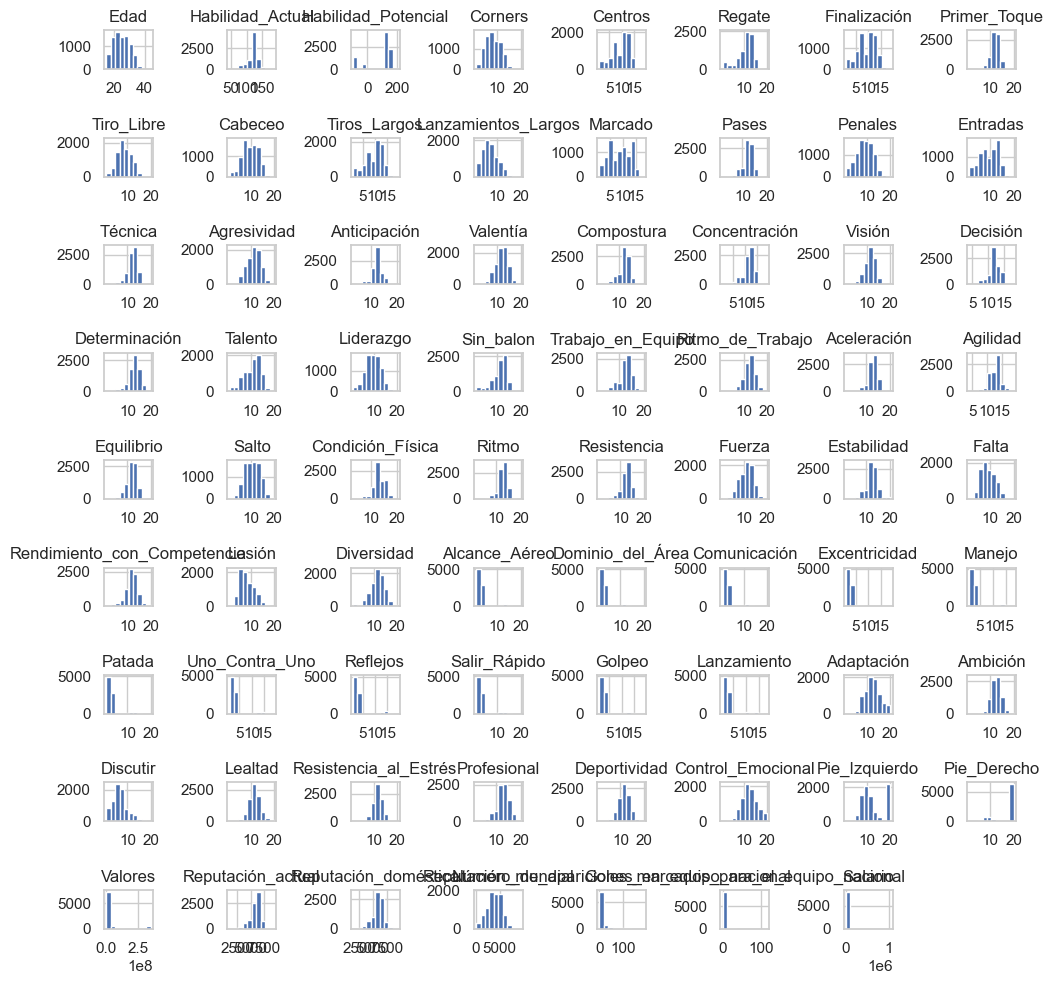

In [147]:
# Gráficos de histogramas para variables numéricas
df_encoded.select_dtypes(include=['int64', 'float64']).hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

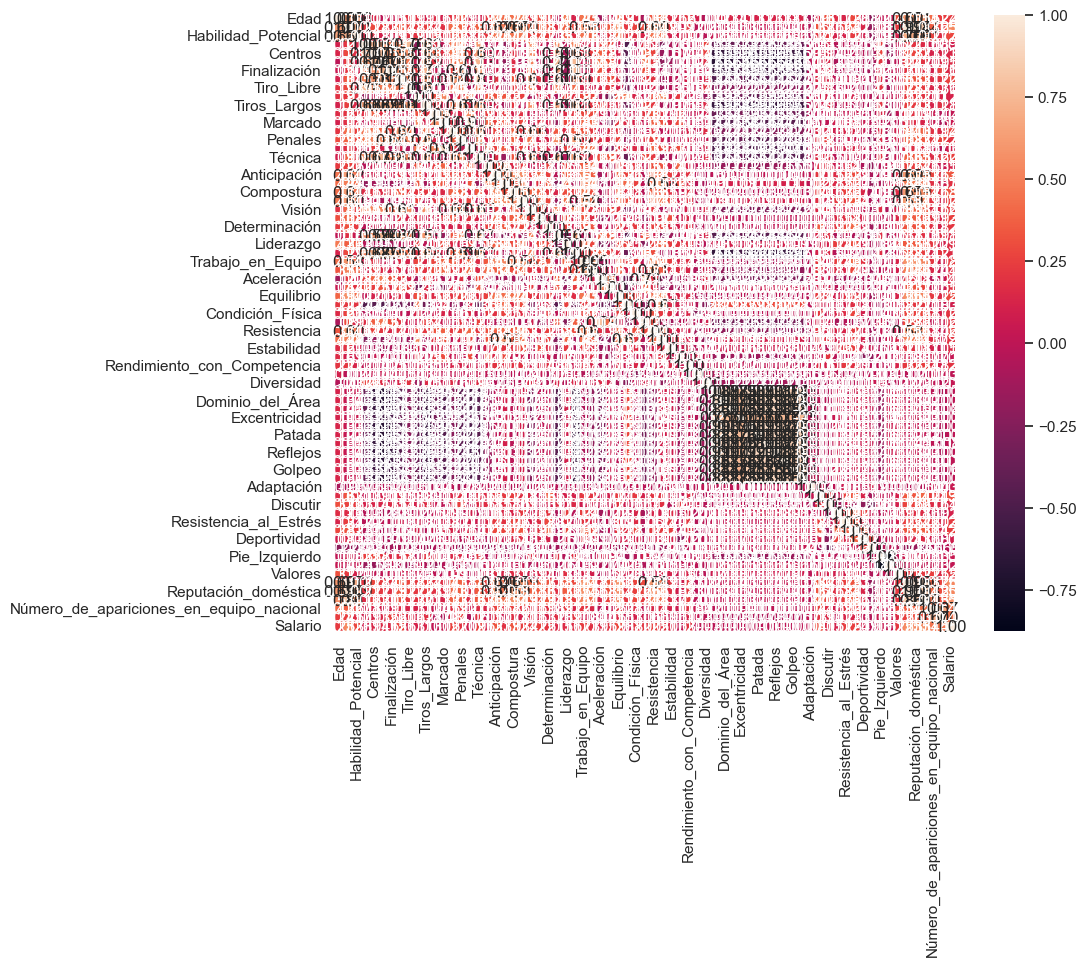

In [148]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.show()

In [149]:
# Verificando datos faltantes
print("Datos faltantes:")
print(df_encoded.isnull().sum())

# Verificando duplicados
print("Duplicados:")
print(df_encoded.duplicated().sum())

Datos faltantes:
Edad                                          0
Habilidad_Actual                              0
Habilidad_Potencial                           0
Corners                                       0
Centros                                       0
                                           ... 
Reputación_doméstica                          0
Reputación_mundial                            0
Número_de_apariciones_en_equipo_nacional      0
Goles_marcados_para_el_equipo_nacional        0
Salario                                     107
Length: 71, dtype: int64
Duplicados:
0


In [150]:
# rellenar faltantes con mediana
df_encoded['Salario'] = df_encoded['Salario'].fillna(df_encoded['Salario'].median())
df_encoded

,Edad,Habilidad_Actual,Habilidad_Potencial,Corners,Centros,Regate,Finalización,Primer_Toque,Tiro_Libre,Cabeceo,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,31,189,189,14,19,15,16,16,17,6,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,23,188,197,13,13,18,17,18,12,7,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,33,186,190,3,8,13,19,18,15,17,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,22,185,195,7,10,14,18,16,13,15,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,30,185,187,12,14,17,17,17,12,10,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,16,45,135,3,4,5,4,4,1,6,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,17,45,135,2,2,11,11,11,2,6,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,23,45,-75,1,1,1,2,4,1,12,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,17,45,135,3,4,12,7,8,3,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [151]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Edad                                      8452 non-null   int64  
 1   Habilidad_Actual                          8452 non-null   int64  
 2   Habilidad_Potencial                       8452 non-null   int64  
 3   Corners                                   8452 non-null   int64  
 4   Centros                                   8452 non-null   int64  
 5   Regate                                    8452 non-null   int64  
 6   Finalización                              8452 non-null   int64  
 7   Primer_Toque                              8452 non-null   int64  
 8   Tiro_Libre                                8452 non-null   int64  
 9   Cabeceo                                   8452 non-null   int64  
 10  Tiros_Largos                        

In [152]:
print(len(df_encoded))

8452


### Fase 4: Modelado

In [153]:
# se cra una nueva columna objetivo que pondera la habilidad actual un poco mas que la potencial
df_encoded['Total_Habilidad'] = 0.6 * df_encoded['Habilidad_Actual'] + 0.4 * df_encoded['Habilidad_Potencial']

In [154]:
modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

X = df_encoded.drop(['Total_Habilidad'], axis=1)
# variable obj
y = df_encoded['Total_Habilidad']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

# validacion cruzada
for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score                           Mejores Parámetros
0  LinearRegression     1.000000                                           {}
1      DecisionTree     0.999597                            {'max_depth': 12}
2      RandomForest     0.999809       {'max_depth': 12, 'n_estimators': 300}
3  GradientBoosting     0.999870  {'learning_rate': 0.1, 'n_estimators': 200}
4           XGBoost     0.999892  {'learning_rate': 0.1, 'n_estimators': 200}

El mejor modelo es: LinearRegression() con un score de: 1.0


['mejor_modelo.joblib']

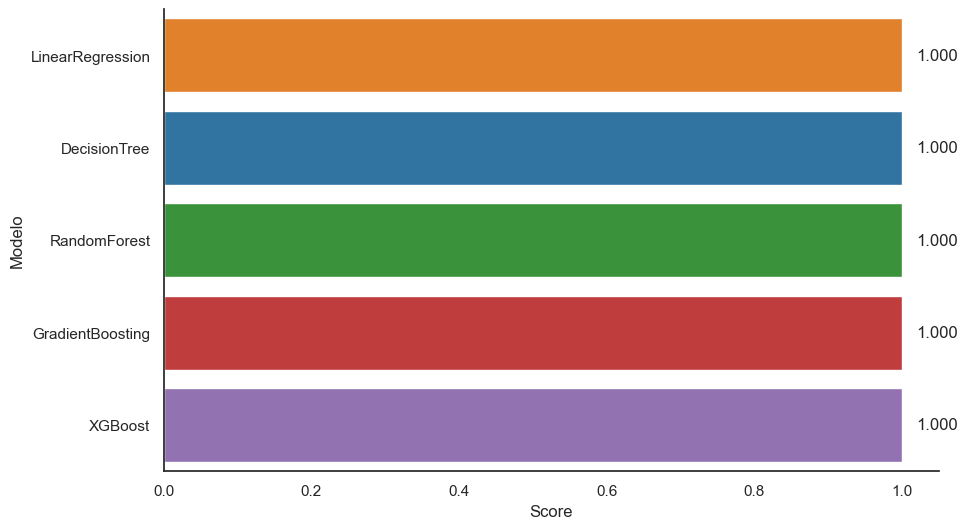

In [155]:
# score de los modelos x seaborn
sns.set(style="white")
colores = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Mejor Score', y='Modelo', data=df_resultados, palette=colores)

# Mostrar los valores en cada barra
for i, p in enumerate(ax.patches):
    score = format(p.get_width(), '.3f')
    x = p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2.
    ax.annotate(score, (x, y), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.xlabel("Score")
sns.despine()
plt.savefig('resources/4.models_scores.png', bbox_inches='tight')
plt.show()

### Fase 5: Evaluación

#### 5.1 Evaluación de los datos de prueba

In [156]:
# Obtener las predicciones del mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

In [157]:
# métricas de evaluación (MSE, RMSE, R^2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 4.83801031650012e-16
RMSE: 2.199547752721027e-08
R^2: 1.0


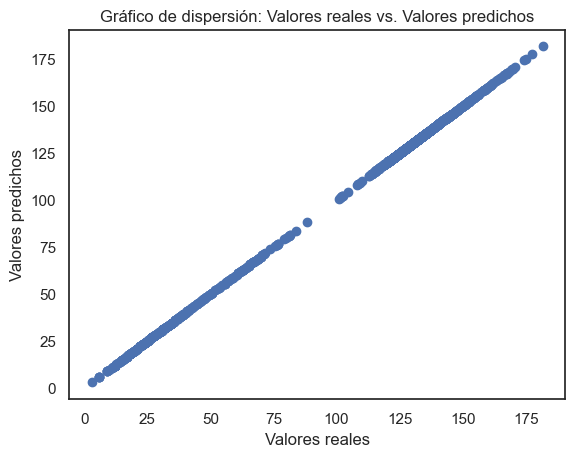

In [158]:
# visualizacion graf dispersion con matplotlib
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Gráfico de dispersión: Valores reales vs. Valores predichos')
plt.savefig('resources/5.grafico_dispersion.png', bbox_inches='tight')
plt.show()

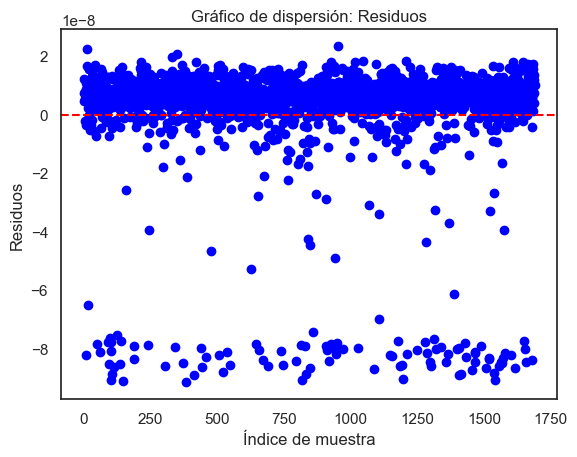

In [159]:
# visualizacion residuos graf dispersion con matplotlib
residuos = y_test - y_pred
plt.scatter(range(len(residuos)), residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Índice de muestra')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión: Residuos')
plt.savefig('resources/6.residuos.png', bbox_inches='tight')
plt.show()

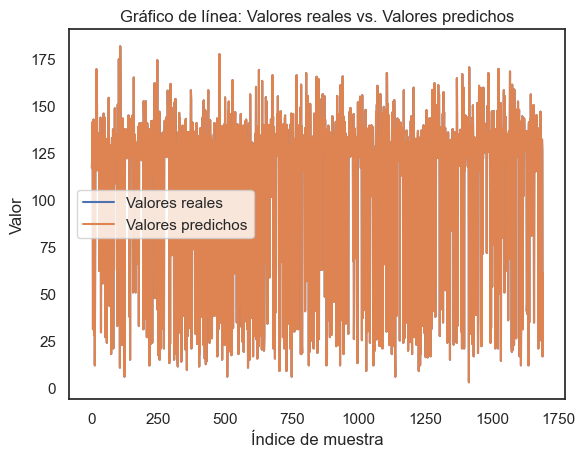

In [160]:
plt.plot(range(len(y_test)), y_test, label='Valores reales')
plt.plot(range(len(y_pred)), y_pred, label='Valores predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Gráfico de línea: Valores reales vs. Valores predichos')
plt.legend()
plt.savefig('resources/7.prediccion_valores.png', bbox_inches='tight')
plt.show()

#### 5.2 Importancia características

In [161]:
best_grid = load('mejor_modelo.joblib')
selected_model = best_grid.best_estimator_

if hasattr(selected_model, 'feature_importances_'):
    features = X_train.columns
    importances = selected_model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_importances = feature_importances.sort_values('Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.savefig('resources/8.caracteristicas_modelo.png', bbox_inches='tight')
    plt.show()
else:
    print(f"El modelo {type(selected_model).__name__} no tiene el atributo 'feature_importances_'.")

El modelo LinearRegression no tiene el atributo 'feature_importances_'.


#### 5.2 Prediccion

In [162]:
# Realiza la predicción de las probabilidades
valores_predichos = mejor_modelo.predict(X)

# Crea un DataFrame con los valores predichos y otras columnas de interés
df_predicciones = pd.DataFrame(valores_predichos, columns=['total_jugador'])
df_predicciones['jugador_nombre'] = df_jugadores_filtrado['Nombre']
df_predicciones['equipo_nombre'] = df_jugadores_filtrado['Club']
df_predicciones['jugador_nacionalidad'] = df_jugadores_filtrado['Nacionalidad']
df_predicciones.sort_values('total_jugador', ascending=False, inplace=True)

df_predicciones

,total_jugador,jugador_nombre,equipo_nombre,jugador_nacionalidad
1,1.916000e+02,Kylian Mbappé,Paris Saint-Germain,France
0,1.890000e+02,Kevin De Bruyne,Manchester City,Belgium
3,1.890000e+02,Erling Haaland,Manchester City,"Norway,England"
9,1.880000e+02,Lionel Messi,Paris Saint-Germain,"Argentina,Spain"
2,1.876000e+02,Robert Lewandowski,Barcelona,Poland
...,...,...,...,...
8434,1.200000e+00,Borja,R. Madrid,Spain
8436,6.000000e-01,Aimar1,R. Madrid,Spain
8439,-1.291703e-08,Roman Mokrovics,Sigma Olomouc,Czech Republic
8440,-1.502325e-08,Ştefan Moraru,Fotbal Club FCSB,Romania


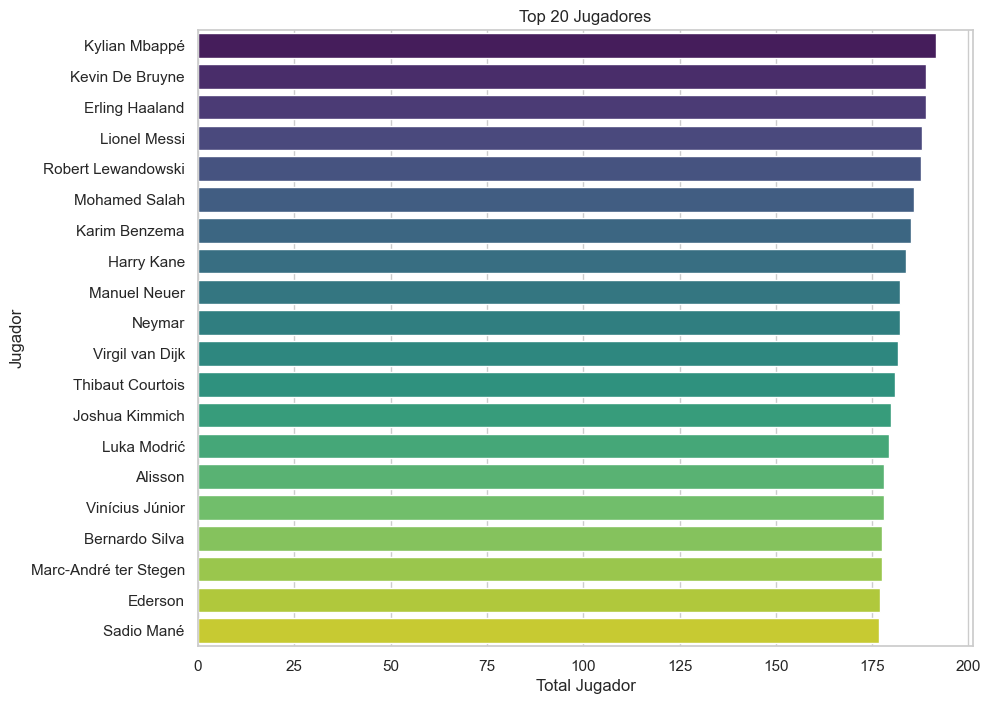

In [163]:
# visualizar top  20 jugadores con  mejor predicción
top_jugadores = df_predicciones.head(20)
sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))
sns.barplot(x='total_jugador', y='jugador_nombre', data=top_jugadores, palette='viridis')
plt.xlabel('Total Jugador')
plt.ylabel('Jugador')
plt.title('Top 20 Jugadores')
plt.savefig('resources/9.top_20_jugadores.png', bbox_inches='tight')
plt.show()

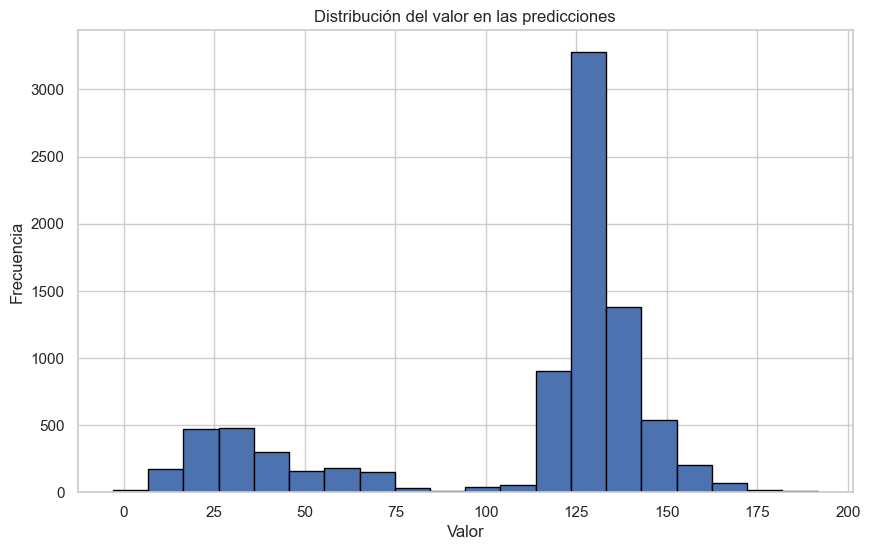

In [164]:
# histograma de  predicciones de valor total_jugador
plt.figure(figsize=(10, 6))
plt.hist(df_predicciones['total_jugador'], bins=20, edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución del valor en las predicciones')
plt.savefig('resources/10.histograma_valores.png', bbox_inches='tight')
plt.show()

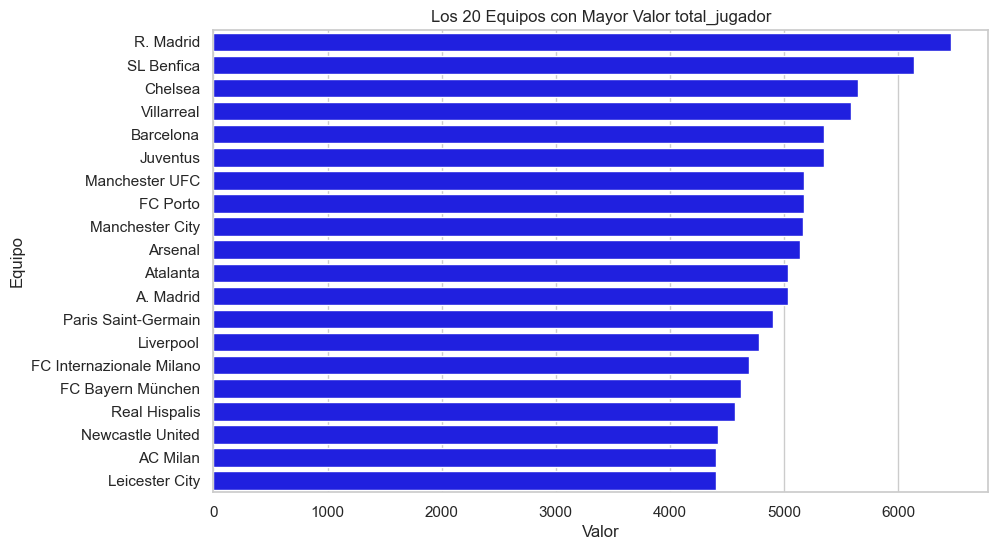

In [165]:
# visuializar top  20 equipos con mayor valor
df_equipos = df_predicciones.groupby('equipo_nombre')['total_jugador'].sum().reset_index()
df_equipos = df_equipos.sort_values('total_jugador', ascending=False)
top_20_equipos = df_equipos.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='equipo_nombre', data=top_20_equipos, color='blue')
plt.xlabel('Valor')
plt.ylabel('Equipo')
plt.title('Los 20 Equipos con Mayor Valor total_jugador')
plt.savefig('resources/11.top_20_equipos.png', bbox_inches='tight')
plt.show()